# Tema 3: Entrega práctica - Estudio final preprocesado

### Autor: Juan José Méndez Torrero

### Asignatura: Procesamiento y Visualización de Datos

# Fuente de datos

El conjunto de datos para esta práctica contiene información sobre en el número de áreas quemadas en el bosque de Portugual. Este conjunto de datos se pueden encontrar en la base de datos de al [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Forest+Fires). Se ha elegido este dataset ya que cuenta con un número suficiente de instancias (517) y características (12). Estas características son:

- X - coordenada espacial del eje x dentro del mapa del parque de Montesinho: 1 a 9 
- Y - coordenada espacial del eje Y dentro del mapa del parque de Montesinho: 2 a 9 
- moth - mes del año: 'ene' a 'dic' 
- day - día de la semana: 'mon' a 'sun' 
- FFMC - índice FFMC del sistema FWI: de 18,7 a 96,20 
- DMC - Índice DMC del sistema FWI: 1,1 a 291,3 
- DC - Índice DC del sistema FWI: 7,9 a 860,6 
- ISI - Índice ISI del sistema FWI: 0,0 a 56,10 
- temp - temperatura en grados Celsius: de 2,2 a 33,30 
- RH - humedad relativa en %: 15,0 a 100 
- wind - velocidad del viento en km/h: 0,40 a 9,40 
- rain - lluvia exterior en mm/m2 : 0,0 a 6,4 

Además, este conjunto de datos cuenta con un variable a predecir denominada __area__ y almacena la superficie quemada del bosque (en ha): 0.00 a 1090.84 

Este conjunto de datos nos permitirá aplicar las distintas técnicas de preprocesado vistas a lo largo del curso, ya que cuenta tanto con variables de tipo numérico, como de tipo categórico. Además, este conjunto de datos no está preprocesado de antemano.

# Código de extracción de datos

In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=",")
data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

# Análisis preliminar

Una vez hemos realizado los cambios sobre las características, separaremos las columnas numéricas y las columnas catégoricas para su posterior uso en el análisis del conjunto de datos.

In [2]:
def get_columns_types(data):
    numeric_columns = []
    nominal_columns = []

    for col in data.columns.values:
        
        if pd.api.types.is_numeric_dtype(data[col]):
            numeric_columns.append(col)

        else:
            nominal_columns.append(col)

    print("Las columnas numéricas son: {0}".format(str(numeric_columns)))
    print("Las columnas nominales son: {0}".format(str(nominal_columns)))

    return numeric_columns, nominal_columns

numeric_columns, nominal_columns = get_columns_types(data)

Las columnas numéricas son: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Las columnas nominales son: ['month', 'day']


Se puede observar que las características _X_ e _Y_ han sido consideradas como numéricas, cuando en realidad, en este dataset han de tomar valores categórcios, con lo que realizamos la conversión a categórico. Este cambio se realizará utilizando utilizando la clase de pandas _CategoricalDType_

In [3]:
import numpy as np

type_x = pd.CategoricalDtype(categories=np.unique(data["X"]), ordered=False)
type_y = pd.CategoricalDtype(categories=np.unique(data["Y"]), ordered=False)

data["X"] = data["X"].astype(type_x)
data["Y"] = data["Y"].astype(type_y)

numeric_columns, nominal_columns = get_columns_types(data)

Las columnas numéricas son: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Las columnas nominales son: ['X', 'Y', 'month', 'day']


In [4]:
data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

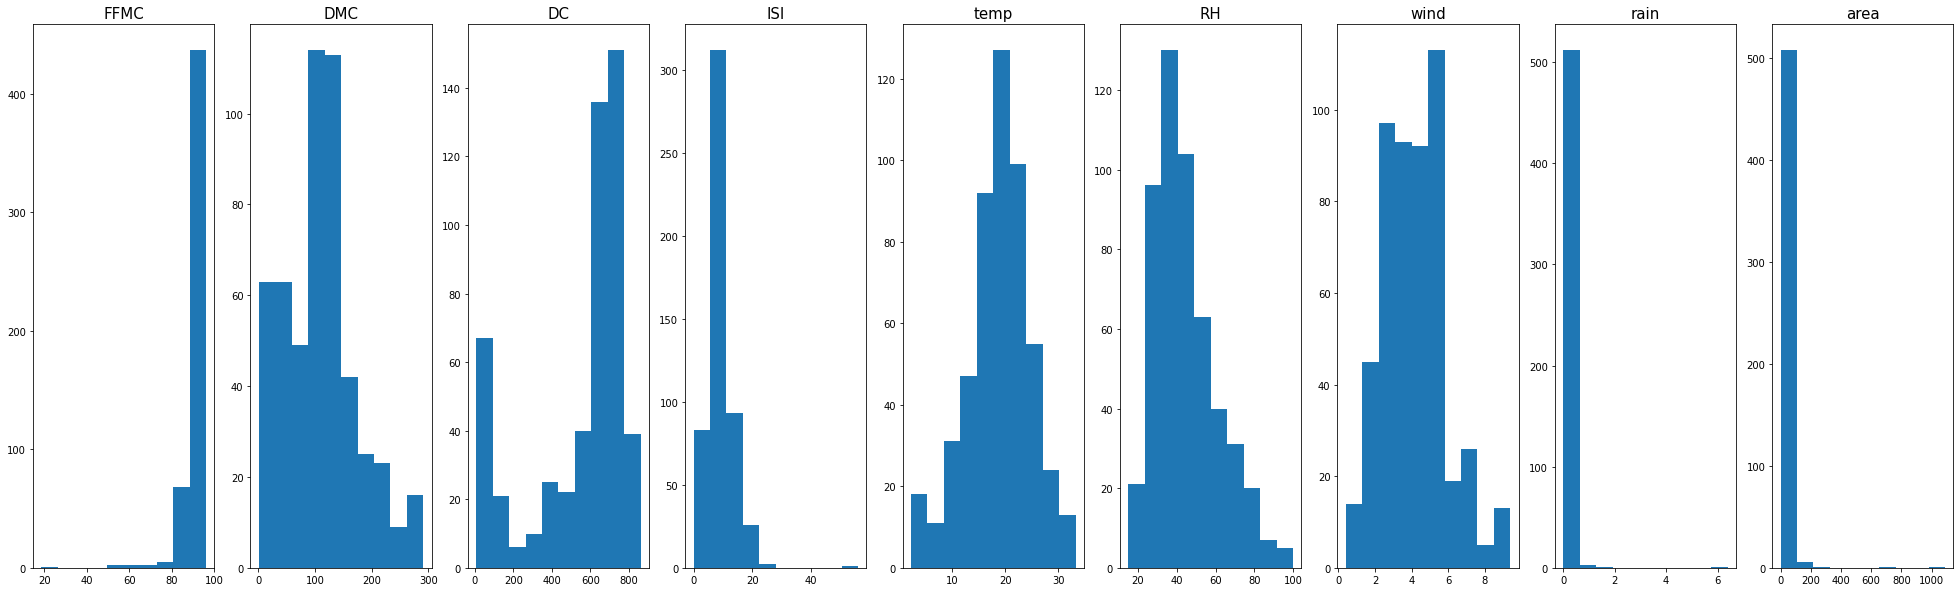

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (50,10))

i=1

for col in numeric_columns:
    ax = fig.add_subplot(1,len(data.columns), i)
    ax.set_title(col, fontsize = 15)
    ax.hist(data[col], bins=10)

    i += 1



<AxesSubplot:>

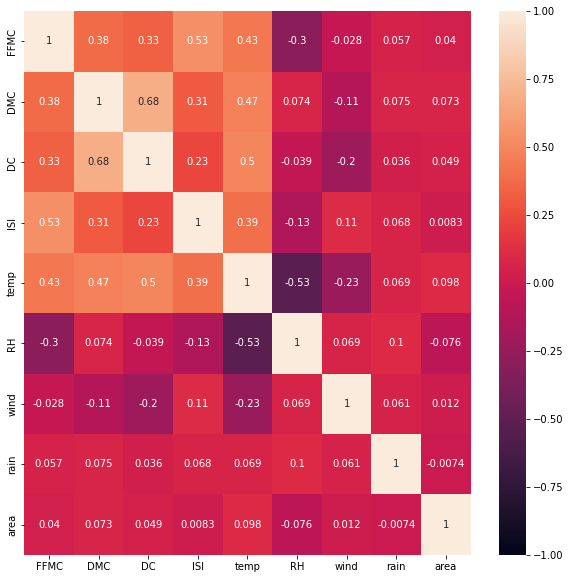

In [6]:
import seaborn as sns # pip install seaborn

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, ax=ax)

# Transformación de los datos

Ahora, vamos a sustituir los valores anómalos por __na__ usando el método _z-score_.

In [7]:
umbral_z_score = 4.0

data_with_outliers = data.copy()

desc = data.describe()
for i, fila in data.iterrows():
    for caract in desc:
        z_score = abs(data.loc[i][caract] - desc.loc['mean'][caract]) / desc.loc['std'][caract]
        if z_score > umbral_z_score:
            data_with_outliers.loc[i,caract] = np.nan

data_with_outliers.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  511.000000  517.000000  517.000000  516.000000  517.000000  517.000000   
mean    91.087280  110.872340  547.940039    8.930426   18.889168   44.288201   
std      3.272879   64.046482  248.066192    4.064139    5.806625   16.317469   
min     69.000000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.300000   68.600000  437.700000    6.475000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.725000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   22.700000   33.300000  100.000000   

             wind        rain        area  
count  517.000000  515.000000  514.000000  
mean     4.017602    0.006602    8.806226  
std      1.791653    0.069707   24.657173  
min      0.400000    0.000000    0.000000  
25%      2.700000    0.000000    0.000000  
50%      4.000000    0.000000    0.495000  
75%      4.900000    0.000000    6.437500  
max      9.400000    1.000000  212.880000

Una vez se han sustituido los valores anómalos, los sustituimos por el valor medio de esa columna.

In [8]:
data = data.fillna(data.mean())
data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

# One-hot encoding
A continuación, se realizará el proceso de _one hot encoding_ para poder usar los valores de las columnas categóricas. Para ello, haremos uso de la función predefinida de pandas _get_dummies_, qu nos permitirá crear un one-hot encoding para las 4 columnas categóricas (_X_, _Y_, _month_ y _day_)

In [9]:
data = pd.get_dummies(data)
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X_1',
       'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3',
       'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

# Normalización

Ahora es turno de las variables numéricas. Como hemos podido observar en las distribuciones de las caracterísitcas, sólo las variables _temp_ y _RH_ parecen tener una distribución normal, aunque el rango de estas caracterísitcas es muy grande, con lo que lo siguiente que se va a hacer es estandarizar estas características entre [0 y 1], es decir, vamos a normalizar las variables.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

data[numeric_columns] = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

In [11]:
data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.928318    0.378264    0.633329    0.160814    0.536629    0.344567   
std      0.071227    0.220698    0.290918    0.081274    0.186708    0.191970   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.922581    0.232598    0.504046    0.115865    0.427653    0.211765   
50%      0.940645    0.369400    0.769673    0.149733    0.549839    0.317647   
75%      0.957419    0.486906    0.827958    0.192513    0.662379    0.447059   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             wind        rain        area         X_1  ...   month_nov  \
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000   
mean     0.401956    0.003385    0.011777    0.092843  ...    0.001934   
std      0.199073    0.046244    0.058355    0.290494  ...    0.043980   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.255556    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.400000    0.000000    0.000477    0.000000  ...    0.000000   
75%      0.500000    0.000000    0.006023    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

        month_oct   month_sep     day_fri     day_mon     day_sat     day_sun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.029014    0.332689    0.164410    0.143133    0.162476    0.183752   
std      0.168007    0.471632    0.371006    0.350548    0.369244    0.387657   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed  
count  517.000000  517.000000  517.000000  
mean     0.117988    0.123791    0.104449  
std      0.322907    0.329662    0.306138  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 44 columns]

# Análisis PCA
En esta sección se realizará el proceso PCA (Principal Component Analysis) para realizar una selección de un conjunto de características para que retenga gran parte de la información del resto de características.

In [12]:
from sklearn import decomposition

y = data["area"]

data = data.drop(["area"], axis=1)

pca = decomposition.PCA(n_components=3)

data_pca = pca.fit_transform(data)

In [14]:
data_pca_df = pd.DataFrame(data_pca, columns=["PC1", "PC2", "PC3"])

data_pca_df.head()

PC1       PC2       PC3
0  0.540421 -0.376246  1.105303
1 -0.083596  0.749715  0.326761
2 -0.052672  0.764497  0.411476
3 -0.068718 -0.553810  0.714518
4 -0.288789 -0.555940  0.656175

In [15]:
print('La varianza explicada del componente principal es: {}'.format(pca.explained_variance_ratio_))

La varianza explicada del componente principal es: [0.11575437 0.10551089 0.08161339]
